In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Let's analyize if a particular internet user **clicked on an advertisement** on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


# LOGISTIC REGRESSION
A classification algorithim where the response variable is categorical. Example:
Use a credit score and bank balance to predict whether a customer with default Response varialble = Default or No Default
Use average rebounds per game and average ponts per game to predicts if a basketball player will get drafted to the NBA Response variable = Drafted or Not Drafted
Based on square footage and number of bedrooms to predict if a house price will be over 200K Response varialbe = Yes or No
p(X) = eβ0 + β1X1 + β2X2 + … + βpXp / (1 + eβ0 + β1X1 + β2X2 + … + βpXp)

Use of the probability threshold to classify the observation as either 1 or 0.

For example, we might say that observations with a probability greater than or equal to 0.5 will be classified as “1” and all other observations will be classified as “0.”

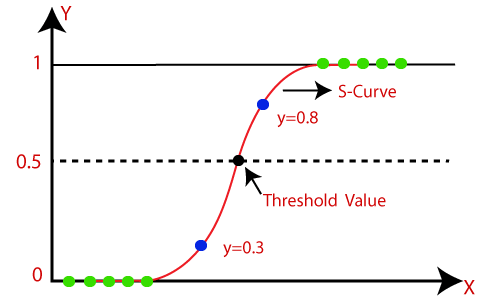

In [ ]:
df=pd.read_csv('../input/my-datasets/advertising.csv')
df.head()

In [ ]:
df.info()
#1000 rows with 10 columns
#data type on right tell us what, if any we need to change for our machine learning model

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.describe()
#generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.



# EXPLORATORY DATA ANALYSIS

In [ ]:
sns.pairplot(df)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Correlation between:
* Clicked on Ad and Age, 
* Daily Internet Usage and Daily Time Spent on Site,


In [ ]:
sns.histplot(df['Age'], kde=False, bins=30)

Histogram normally distribution about 35 years of age

In [ ]:
#jointplot showing Area Income versus Age
sns.jointplot(data=df, x='Age', y='Area Income')

In [ ]:
#jointplot showing kde distributions of Daily Time spent on site vs Age
sns.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde', color='blue',fill='True')

And we can kind of see the relationship between the Area Income versus Age.

A little scattered but it does look like there's a trend that the only start earning stuff once you start getting into your 20s which makes sense.

And then as you get older into your 30's looks like your income maybe starts to increase but as you get even older than that towards retirement either you start getting no income or it drops.

In [ ]:
#jointplot of Daily Internet Usage vs Daily Time Spent on Site
sns.jointplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', color='purple')

Well it looks like to be almost a circular pattern in this paired diagram.
Looks like we can definitely see two clusters here.  One on the top right -  as you go higher in daily Internet usage and higher in daily time spent on the site.

And on the botton left, if you spend less time on the internet you also spend less time on the site.



In [ ]:
#Let's make a pairplot with Clicked on Ad as HUE because we do want to answer that question
sns.pairplot(df, hue='Clicked on Ad')

Can see that there is relationship between Clicked on Ad and areas such as Age, and Daily Time Spent on Site,and Area Income.  These factors seems to have a relationship on whether they clicked on the ad.
The blue and orange seperation is a good indicator.

# SPLIT, TRAIN AND PREDICT THE MODEL

train test split and we need to train our model.
Choose features we want to train on - add numerical data.  Can not add strings unless we convert to numeric.

In [ ]:
df.head(1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Split data into features and target

X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']] #add nuimerical features
y = df['Clicked on Ad'] #target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Train and fit logistic regression model on training set

lrmodel=LogisticRegression()
lrmodel.fit(X_train, y_train) #training the model

#Make predictions
predictions = lrmodel.predict(X_test) #predicting values for the testing data off of training data
#passing in test data as X_test

# EVALUATION METRICS
Accuracy score and classification report for the model

In [ ]:
acc_logreg = round(accuracy_score(predictions, y_test)*100, 2)
acc_logreg

In [ ]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Good precision and recal score, in the 90's
A few mislabeled data from the confusion matrix at the bottom 8 and 14